In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

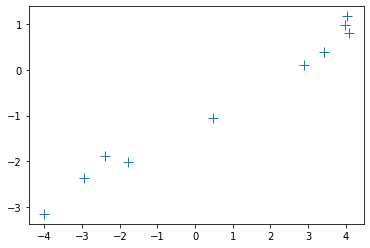

In [2]:
N = 10
x = np.random.uniform(-5,5,size=N)
epsilon = np.random.normal(0,.3,size=N)
y = -1 + .5 * x + epsilon
plt.plot(x,y,linestyle='None',marker='+',markersize=10)

# Probabilistic Model

In [3]:
xs = np.linspace(-5,5,100)

In [4]:
with pm.Model() as linear_model:
    theta0 = pm.Normal("theta0",mu=0,sigma=10)
    theta1 = pm.Normal("theta1",mu=0,sigma=10)
    sigma = pm.Exponential("sigma",.01)
    y_observed = pm.Normal("y_observed",mu=theta0+theta1*x,sigma=sigma,observed=y)
    prior = pm.sample_prior_predictive()
    posterior = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, theta1, theta0]
100%|██████████| 1000/1000 [00:01<00:00, 921.76it/s]
The acceptance probability does not match the target. It is 0.8890023634298677, but should be close to 0.8. Try to increase the number of tuning steps.


# Plotting posterior distributions

(array([  5.,  11.,  50., 125., 202., 248., 215.,  90.,  43.,  11.]),
 array([-1.07143548, -1.05221101, -1.03298654, -1.01376206, -0.99453759,
        -0.97531312, -0.95608864, -0.93686417, -0.9176397 , -0.89841522,
        -0.87919075]),
 <a list of 10 Patch objects>)

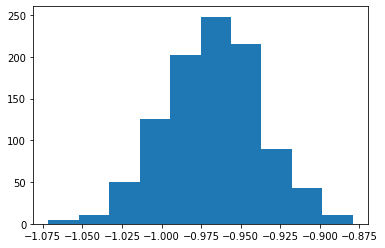

In [56]:
#plt.hist(prior['theta0'])
#plt.hist(prior['theta1'])
plt.hist(prior['sigma'],bins=np.linspace(0,700,50))
plt.hist(posterior['theta0'])
plt.hist(posterior['theta1'])
plt.hist(posterior['sigma'])
plt.scatter(posterior['theta0'],posterior['theta1'])
plt.scatter(posterior['theta0'],posterior['sigma'])
plt.scatter(posterior['theta1'],posterior['sigma'])

# Confidence Interval

In [20]:
pm.hpd(posterior,.05)[0]['sigma']
pm.hpd(posterior,.05)[0]['theta0']
pm.hpd(posterior,.05)[0]['theta1']
sigma_mean = posterior['sigma'].mean()
theta0_mean = posterior['theta0'].mean()
theta1_mean = posterior['theta1'].mean()
map_estimate = pm.find_MAP(model=linear_model)
sigma_map = map_estimate['sigma']
theta0_map = map_estimate['theta0']
theta1_map = map_estimate['theta1']

array(0.45120676)

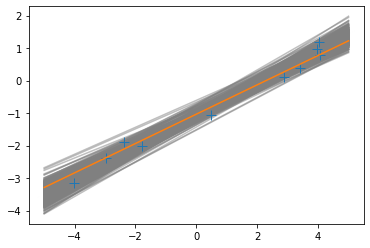

In [31]:
xs = np.linspace(-5,5,100)
g = posterior['theta0']+posterior['theta1']*xs[:,np.newaxis]
g_map = theta0_map + theta1_map*xs
plt.plot(xs,g,color='gray',alpha=.5)
plt.plot(x,y,linestyle='None',marker='+',markersize=10)
plt.plot(xs,g_map)